In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import json

In [2]:
with open('results/NRE_test_result.json','r',encoding='UTF-8')as f:
    res=json.load(f)

In [3]:
part=res['Results'][-1]
print(part['Metadata']['model_name'])
list=part['Metadata']['class_name']
data=part['Result']
flat=[]
for i in range(len(list)):
    flat.append([data['Categorical']['precision'][i],data['Categorical']['recall'][i],data['Categorical']['f1'][i]])
for t in ['Weighted','Macro','Micro']:
    flat.append([data[t]['precision'],data[t]['recall'],data[t]['f1']])

roberta-base-None_EP8_BS16_LR3e-05_ML128


In [4]:
list.extend(['Weighted','Macro','Micro'])
tab=pd.DataFrame(flat,index=list,columns=['precision','recall','f1score'])
tab

,precision,recall,f1score
"Component-Whole(e2,e1)",0.807692,0.840000,0.823529
Other,0.705405,0.574890,0.633495
"Instrument-Agency(e2,e1)",0.837037,0.843284,0.840149
"Member-Collection(e1,e2)",0.702703,0.812500,0.753623
"Cause-Effect(e2,e1)",0.922680,0.922680,0.922680
"Entity-Destination(e1,e2)",0.880259,0.934708,0.906667
"Content-Container(e1,e2)",0.864516,0.875817,0.870130
"Message-Topic(e1,e2)",0.900452,0.947619,0.923434
"Product-Producer(e2,e1)",0.837209,0.878049,0.857143
"Member-Collection(e2,e1)",0.850000,0.930348,0.888361


<AxesSubplot:>

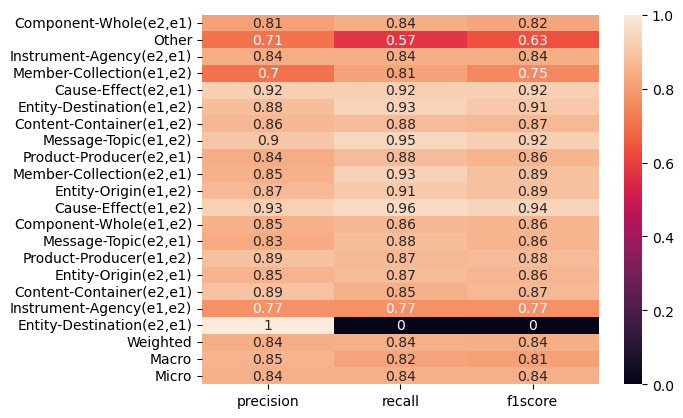

In [5]:
sbn.heatmap(tab,yticklabels=list,xticklabels=['precision','recall','f1score'],annot=True)